In [1]:
%matplotlib inline
import matplotlib.pylab as plt
from matplotlib import cm
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature

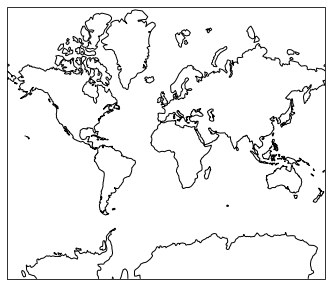

In [7]:
plt.figure(figsize=(10,5))
ax = plt.axes(projection=ccrs.Mercator())
ax.coastlines()

C:\Users\NikolayN\anaconda3\envs\geo_env2\lib\site-packages\cartopy\io\__init__.py:260: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/50m/physical/ne_50m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


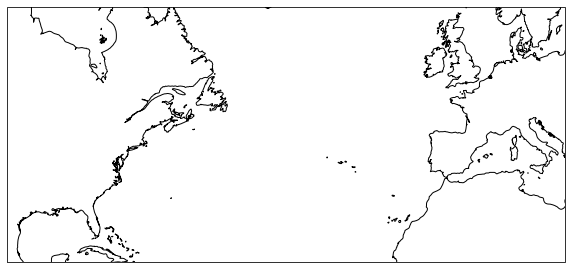

In [8]:
plt.figure(figsize=(10,5))
ax = plt.axes(projection=ccrs.Mercator())
ax.coastlines()
ax.set_extent([-100, 20, 20, 60], crs=ccrs.PlateCarree())

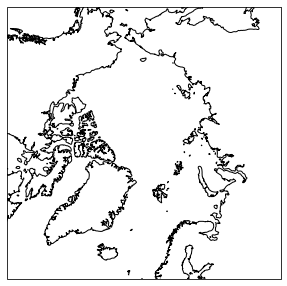

In [9]:
plt.figure(figsize=(10,5))
ax = plt.axes(projection=ccrs.NorthPolarStereo())
ax.coastlines()
ax.set_extent([-180, 180, 60, 90], crs=ccrs.PlateCarree())

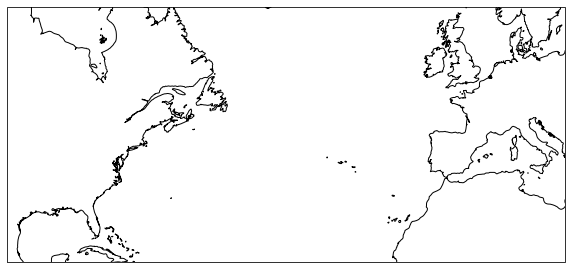

In [10]:
plt.figure(figsize=(10,5))
ax = plt.axes(projection=ccrs.Mercator())
ax.coastlines(resolution = '50m')
ax.set_extent([-100, 20, 20, 60], crs=ccrs.PlateCarree())

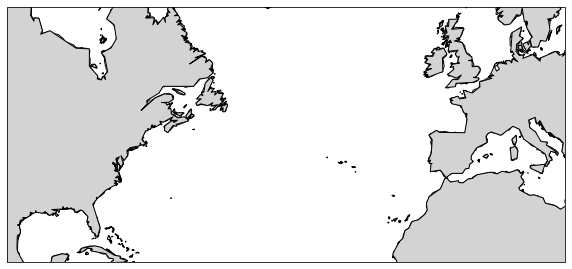

In [11]:
plt.figure(figsize=(10,5))
ax = plt.axes(projection=ccrs.Mercator())
ax.coastlines(resolution = '50m')
ax.set_extent([-100, 20, 20, 60], crs=ccrs.PlateCarree())
ax.add_feature(
            cfeature.GSHHSFeature(levels=[1], scale="coarse", facecolor="lightgray")
        )

In [15]:
from netCDF4 import Dataset
fl = Dataset('data348.nc')
air = fl.variables['TMP_surface'][0,:,:]
lat = fl.variables['latitude'][:]
lon = fl.variables['longitude'][:]

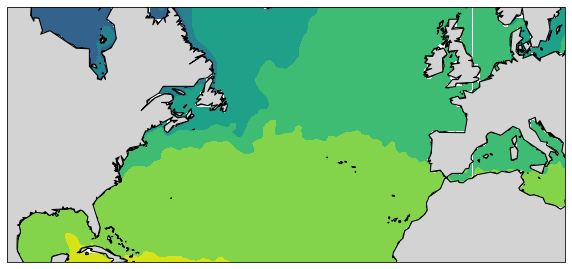

In [22]:
plt.figure(figsize=(10,5))
ax = plt.axes(projection=ccrs.Mercator())
ax.coastlines(resolution = '50m')
ax.set_extent([-100, 20, 20, 60], crs=ccrs.PlateCarree())
ax.add_feature(
            cfeature.GSHHSFeature(levels=[1], scale="coarse", facecolor="lightgray")
        )
ax.contourf(lon, lat, air, transform=ccrs.PlateCarree())

In [23]:
from cartopy.util import add_cyclic_point

In [24]:
air_cyc, lon_cyc = add_cyclic_point(air, coord=lon)

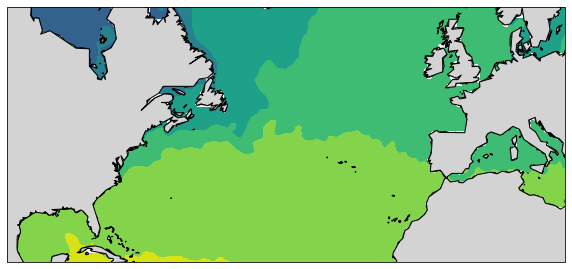

In [25]:
plt.figure(figsize=(10,5))
ax = plt.axes(projection=ccrs.Mercator())
ax.coastlines(resolution = '50m')
ax.set_extent([-100, 20, 20, 60], crs=ccrs.PlateCarree())
ax.add_feature(
            cfeature.GSHHSFeature(levels=[1], scale="coarse", facecolor="lightgray")
        )
ax.contourf(lon_cyc, lat, air_cyc, transform=ccrs.PlateCarree())

In [39]:
lon2d, lat2d = np.meshgrid(lon_cyc, lat)

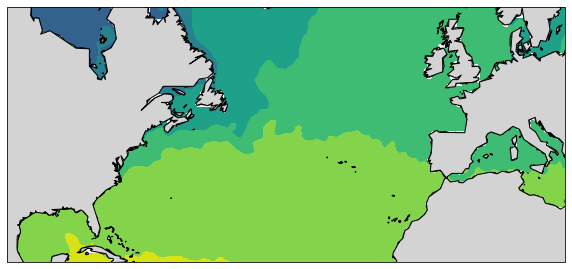

In [41]:
plt.figure(figsize=(10,5))
ax = plt.axes(projection=ccrs.Mercator())
ax.coastlines(resolution = '50m')
ax.set_extent([-100, 20, 20, 60], crs=ccrs.PlateCarree())
ax.add_feature(
            cfeature.GSHHSFeature(levels=[1], scale="coarse", facecolor="lightgray")
        )
ax.contourf(lon2d, lat2d, air_cyc, transform=ccrs.PlateCarree())

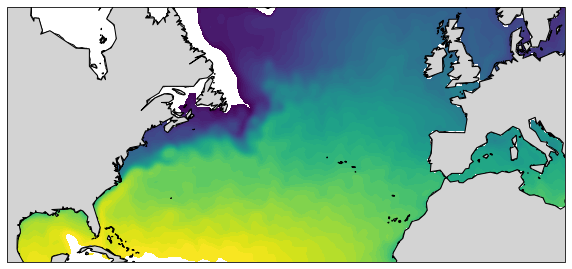

In [42]:
plt.figure(figsize=(10,5))
ax = plt.axes(projection=ccrs.Mercator())
ax.coastlines(resolution = '50m')
ax.set_extent([-100, 20, 20, 60], crs=ccrs.PlateCarree())
ax.add_feature(
            cfeature.GSHHSFeature(levels=[1], scale="coarse", facecolor="lightgray")
        )
ax.contourf(lon_cyc, lat, air_cyc, transform=ccrs.PlateCarree(), levels = np.linspace(275,300,51))

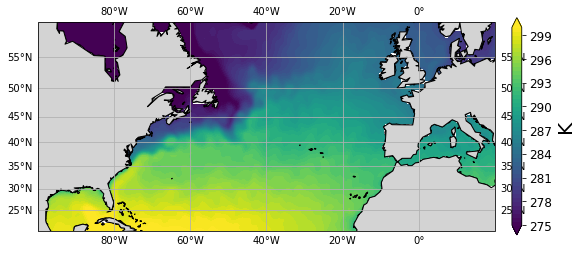

In [45]:
plt.figure(figsize=(10,5))
ax = plt.axes(projection=ccrs.Mercator())
ax.coastlines(resolution = '50m')
ax.set_extent([-100, 20, 20, 60], crs=ccrs.PlateCarree())
ax.add_feature(
            cfeature.GSHHSFeature(levels=[1], scale="coarse", facecolor="lightgray")
        )
image = ax.contourf(lon_cyc,
                    lat,
                    air_cyc,
                    transform=ccrs.PlateCarree(),
                    levels = np.linspace(275,300,51), 
                    extend='both')
cb = plt.colorbar(image, orientation='vertical', pad=0.03, shrink = 0.8)
cb.ax.tick_params(labelsize=12)
cb.set_label('K', size=20)
gl = ax.gridlines(draw_labels=True) # Only PlateCarree and Mercator plots are currently supported.